In [16]:
!wget -N https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

--2023-07-11 20:52:01--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘insurance.csv’ not modified on server. Omitting download.



In [17]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [19]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [20]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [80]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

In [81]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [82]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86
5,31.0,0.0,25.7,0.0,1.0,1.0,3756.62


In [83]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

1     1725.55
2     4449.46
3    21984.47
4     3866.86
5     3756.62
Name: expenses, dtype: float64

In [84]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

49      38709.18
150      5125.22
13      11090.72
1183     9447.38
17       2395.17
Name: expenses, dtype: float64

In [85]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(5),
    layers.Dropout(.1),
    layers.Dense(1),
])

In [86]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 6)                13        
 tion)                                                           
                                                                 
 dense_36 (Dense)            (None, 16)                112       
                                                                 
 dense_37 (Dense)            (None, 5)                 85        
                                                                 
 dropout_12 (Dropout)        (None, 5)                 0         
                                                                 
 dense_38 (Dense)            (None, 1)                 6         
                                                                 
Total params: 216
Trainable params: 203
Non-trainable params: 13
______________________________________________________

In [87]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0,
)

print(history)

9/9 - 0s - loss: 4335.2236 - mae: 4335.2236 - mse: 53484764.0000 - 35ms/epoch - 4ms/step
Testing set Mean Abs Error: 4335.22 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 [==============================] - 0s 2ms/step


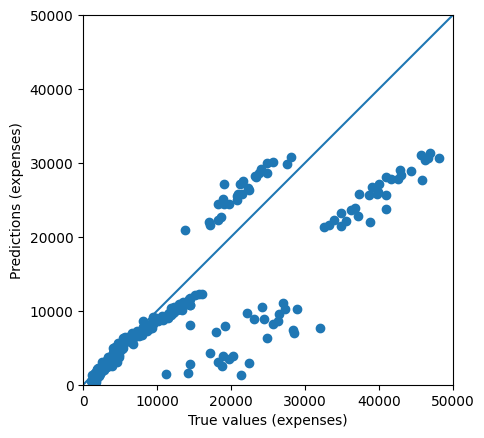

In [75]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)